<h1 style="color:blue"> <u> Death Prediction Project</u></h1>

<a id="student_info"></a>
### Personal information

<b>Name:</b> Tamar Entin <br/>
<b>Id:</b> 210014411

<a id="home"></a>


| Section| About | Section-name |
| :- | :- | :- |  
| 1 |  Imports | [Import packages](#Imports) | 
| 2 |  Load & View Data Set | [Load Data Set](#load_data) | 
| 3 |  Dropping Non Unique Values  | [Dropping Non Unique Values](#nonUniqueValues) | 
| 4 |  Count Null Values  | [Count Null Values](#nulls) | 
| 5 |  Handle Missing Data  | [Handle Missing Data](#missingData) | 
| 6 |  Convert Object Type To Numerical  | [Convert Types](#convertTypes) | 
| 7 |  Histograms  | [Histograms](#Histograms) | 
| 8 |  Correlations  | [Correlations](#Correlations) | 
| 9 |  Outliars Detection & Boxplots  | [Outliars Detection](#Outliars) | 
| 10 |  Statistics  | [Statistics](#statistics) | 
| 11 |  Discretize Continuous Columns  | [Discretize Continuous Columns](#Discretize) | 
| 12 |  Normalize Data  | [Normalize Data](#Normalize) | 




### Intro


<p> In this project, we were given a dataset of medical paramters of people.

We want to predict if a person will die in the next 5 years.</p>

### 
[Go to the beginning of the assignment](#home)
<a id="Imports"></a>
### Import modules (packages)

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler  

#### 
[Go to the beginning of the assignment](#home)
<a id="load_data"></a>
### Get Task Data: Load & View
##### Lets see the data and some basic informartion about it

In [2]:
df = pd.read_csv("death_prediction_synthetic.csv")

In [3]:
columnsNames = df.columns.values
columnsNames

array(['age', 'sex', 'marital_status', 'ses', 'residence_cd', 'residence',
       'weigh', 'heigh', 'BMI', 'bp_sys', 'bp_dias', 'bp_cat', 'smoking',
       'smoking_status', 'HbA1c', 'glucose', 'creatinin', 'albumin',
       'alb24h', 'ACR', 'cholesterol_total', 'LDL', 'HDL',
       'triglycerides', 'TSH', 'gravity_u', 'nitrites_u', 'leuko_u',
       'proteinuria', 'WBC', 'RBC', 'platelets', 'MCV', 'MPV', 'Charlson',
       'framingham_cvd', 'antidiabetics', 'ERD', 'CVD', 'HTN', 'cancer',
       'cardiovascular_meds', 'statines', 'immigrant', 'dead_5y'],
      dtype=object)

#### 
lets see the first and last 5 rows of the data
 

In [4]:
df.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,0.12908,1,0,0,1,0,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,...,0.08500,1,0,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,0.10110,1,0,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,...,0.03950,1,0,0,0,0,0,1,0,0


In [5]:
df.tail()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
12433,46,1,U,2,1,urban,54.0,168.0,18.78,130,...,0.11655,1,0,0,0,0,1,0,0,0
12434,45,2,M,1,1,urban,86.0,151.0,38.16,100,...,0.05701,1,0,0,0,0,0,1,0,0
12435,49,1,U,1,1,urban,61.0,166.0,21.77,104,...,0.41620,0,0,1,1,0,1,1,0,0
12436,47,2,M,1,1,urban,90.0,160.0,35.60,96,...,0.03483,1,0,0,0,0,0,1,0,0
12437,49,2,M,2,1,urban,55.0,156.0,23.01,113,...,0.08328,1,0,0,0,0,1,1,1,0


In [6]:
rows, cols = df.shape
print(f'our dataframe includes {rows} rows and {cols} columns')

our dataframe includes 12438 rows and 45 columns


<code>describe()</code>
<pre> method computes and displays summary statistics for a dataframe </pre>

In [7]:
df.describe()

,age,sex,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,smoking,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,...,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.0,12438.000000,12438.000000,12438.000000,12438.000000
mean,43.501126,1.468805,1.677279,1.062631,89.837746,167.943906,31.871922,124.803988,77.315163,1.636678,...,0.127533,0.857694,0.006593,0.092057,0.318058,0.0,0.602669,0.702203,0.174867,0.015839
std,4.802035,0.499046,0.763641,0.242307,19.296247,10.068620,6.459714,13.615760,8.915362,0.871735,...,0.092716,0.349378,0.080931,0.289117,0.465741,0.0,0.489365,0.457308,0.379869,0.124856
min,30.000000,1.000000,1.000000,1.000000,41.000000,91.500000,15.790000,75.000000,40.000000,1.000000,...,0.007310,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,1.000000,76.000000,160.000000,27.400000,118.000000,70.000000,1.000000,...,0.061800,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,1.000000,1.000000,1.000000,88.000000,168.000000,31.050000,124.000000,79.000000,1.000000,...,0.102370,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
75%,48.000000,2.000000,2.000000,1.000000,100.000000,175.000000,35.350000,130.000000,80.000000,3.000000,...,0.163960,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000
max,49.000000,2.000000,3.000000,2.000000,203.000000,202.000000,95.550000,200.000000,135.000000,3.000000,...,0.802220,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


<code>info() </code> <pre>method prints information about a dataframe including the index dtype and columns, 
non-null values and memory usage </pre>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12438 non-null  int64  
 1   sex                  12438 non-null  int64  
 2   marital_status       12438 non-null  object 
 3   ses                  12438 non-null  int64  
 4   residence_cd         12438 non-null  int64  
 5   residence            12438 non-null  object 
 6   weigh                12438 non-null  float64
 7   heigh                12438 non-null  float64
 8   BMI                  12438 non-null  float64
 9   bp_sys               12438 non-null  int64  
 10  bp_dias              12438 non-null  int64  
 11  bp_cat               12438 non-null  object 
 12  smoking              12438 non-null  int64  
 13  smoking_status       12438 non-null  object 
 14  HbA1c                12438 non-null  float64
 15  glucose              12438 non-null 

We can see that there are 3 types of paramters: int, float and object.
- we will convert the object type which includes strings to numerical type.
- also, we will convert continuous data to discrete

We can see the coulmn names and the amount of non null data

#### 
[Go to the beginning of the assignment](#home)
<a id="nonUniqueValues"></a>
### Dropping non unique values

print the unique values from each column in the dataframe

<code>Series()</code><pre>Series is like a column in a table.

It is a one-dimensional array holding data of any type.</pre>

In [9]:
pd.Series({col:df[col].unique() for col in df})

age                    [49, 46, 45, 41, 47, 42, 44, 33, 43, 48, 39, 4...
sex                                                               [2, 1]
marital_status                                                    [U, M]
ses                                                            [1, 2, 3]
residence_cd                                                      [1, 2]
residence                                                 [urban, rural]
weigh                  [84.0, 67.0, 62.4, 73.9, 53.0, 107.0, 89.0, 85...
heigh                  [160.0, 152.0, 148.0, 166.0, 161.0, 193.0, 172...
BMI                    [32.79, 29.38, 28.31, 26.85, 20.45, 28.86, 30....
bp_sys                 [116, 113, 133, 100, 110, 115, 123, 120, 137, ...
bp_dias                [66, 74, 87, 63, 70, 80, 84, 60, 76, 69, 65, 8...
bp_cat                         [Normal, Pre-HTN, HTN-G2, HTN-G1, HTN-G3]
smoking                                                        [1, 3, 2]
smoking_status                 [non_smoker, current

drop columns that contains a single value

In [10]:
def non_unique_cols_values(df):
    columnsNames = df.columns.values
    nonUniqueColsValues = []
    for col in columnsNames:
        countUniqueValuesInCol = df[col].nunique()
        if(countUniqueValuesInCol <= 1):
            nonUniqueColsValues.append(col)
    print(f'detected columns that will be removed from our df: {nonUniqueColsValues}')
    df.drop(nonUniqueColsValues, inplace=True, axis=1)
    return df

In [11]:
df = non_unique_cols_values(df)
df.shape

detected columns that will be removed from our df: ['cancer']


(12438, 44)

as we can see, there is only one value in the <code>cancer</code> column.

#### 
[Go to the beginning of the assignment](#home)
<a id="nulls"></a>
### Count Null Values
##### How many null values each feature has?

<code>isnull()</code><pre>method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.</pre>

In [12]:
df.isnull().sum().sort_values(ascending=False)

alb24h                 8918
gravity_u              2530
nitrites_u             2520
leuko_u                2507
proteinuria            2506
albumin                1463
ACR                    1212
MCV                       0
WBC                       0
RBC                       0
platelets                 0
age                       0
TSH                       0
Charlson                  0
framingham_cvd            0
antidiabetics             0
ERD                       0
CVD                       0
HTN                       0
cardiovascular_meds       0
statines                  0
immigrant                 0
MPV                       0
HDL                       0
triglycerides             0
sex                       0
marital_status            0
ses                       0
residence_cd              0
residence                 0
weigh                     0
heigh                     0
BMI                       0
bp_sys                    0
bp_dias                   0
bp_cat              

<div>  count of null values in each column </div>

In [13]:
print(f'Total number of missing values: {df.isna().sum().sum()}')

Total number of missing values: 21656


In [14]:
print(f'Number of COLUMNS with at least 20% missing value: {(df.isna().sum(axis=0) > df.shape[0]//5).sum()}')

Number of COLUMNS with at least 20% missing value: 5


In [15]:
print(f'Number of ROWS with at least 5 missing value: {(df.isna().sum(axis=1) > 4).sum()}')

Number of ROWS with at least 5 missing value: 2014


<AxesSubplot: >

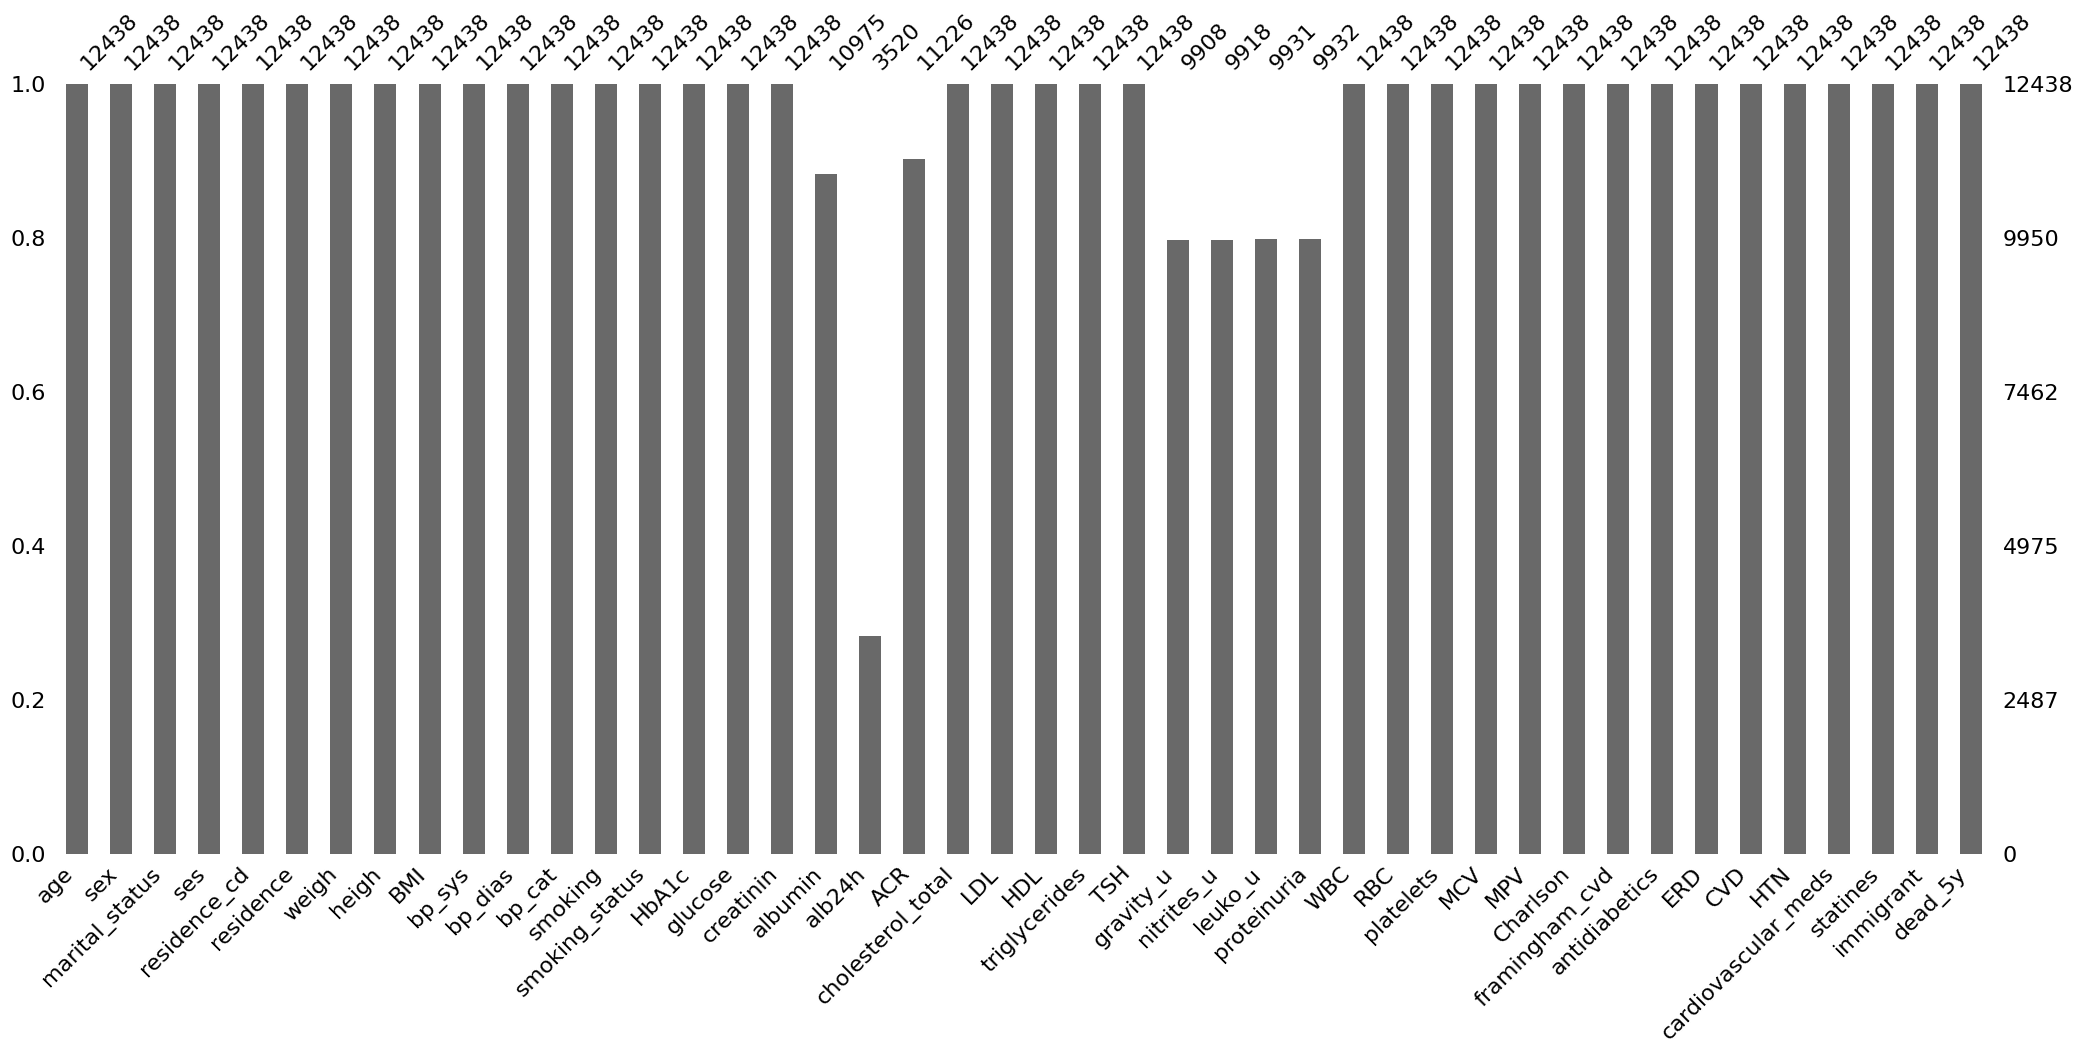

In [16]:
msno.bar(df)

#### 
[Go to the beginning of the assignment](#home)
<a id="missingData"></a>
### Handle missing data

For better understanding the missing the data, let's create a table containing the columns with at least 20% missing values, the exact amount of NaNs and the col type

In [17]:
columnsWithMissingData = {
    'Col_Name': [],
    'NaN_values': [],
    'Col_Type': [],
}

df.reset_index(drop = True)
columnsWithMissingData['Col_Name'] = df.columns[df.isna().sum(axis=0) > df.shape[0]//5]

for col in columnsWithMissingData['Col_Name']:
    columnsWithMissingData['NaN_values'].append(df[col].isna().sum()) 
    columnsWithMissingData['Col_Type'].append(df[col].dtype) 

columnsWithMissingDataTable = pd.DataFrame(columnsWithMissingData)
columnsWithMissingDataTable


,Col_Name,NaN_values,Col_Type
0,alb24h,8918,float64
1,gravity_u,2530,float64
2,nitrites_u,2520,float64
3,leuko_u,2507,float64
4,proteinuria,2506,float64


In order to know if a colums is neccessry, we should check the correlation with the target column.

In [18]:
corr = np.abs(df.corr())

corr["dead_5y"].sort_values()

/var/folders/2q/4_fb3k3s7wx4q6_tmlc5c4q00000gp/T/ipykernel_21001/3849235841.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(df.corr())


gravity_u              0.000656
residence_cd           0.001759
statines               0.001879
platelets              0.002069
cardiovascular_meds    0.005625
weigh                  0.005919
heigh                  0.006377
alb24h                 0.006385
sex                    0.006910
BMI                    0.007581
triglycerides          0.009334
nitrites_u             0.009571
age                    0.009961
RBC                    0.010659
glucose                0.012117
leuko_u                0.013016
MCV                    0.014388
HbA1c                  0.017850
HDL                    0.018943
bp_dias                0.021303
ses                    0.023255
HTN                    0.025363
MPV                    0.029191
immigrant              0.029754
LDL                    0.031017
WBC                    0.031118
albumin                0.032052
cholesterol_total      0.035623
smoking                0.035884
creatinin              0.044907
antidiabetics          0.047861
ERD     

First, the <code>alb24h</code> column has many nan values -  more than 70%, and it is not significantly correlated with the number of dead, so we can drop it.

Also, we can drop <code>gravity_u</code> column, since the correlation to <code>dead_5y</code> is very low - 0.000656

In [19]:
df.drop(['alb24h', 'gravity_u'], axis=1, inplace=True)

The three columns: <code>nitrites_u</code>, <code>leuko_u</code>, <code>proteinuria</code> <br/>
are related to the indicators found in the urine. As we can see, there is about the same amount of missing data in each column, which means that it is understandable that the tests are usually done at the same time. This is an important measure, so we will fill in the missing information.

Categorize the data as numerical values, using the following values:

Normal: 0 <br/>
Abnormal: 1 <br/>
Did not take the test: 2 <br/>

- The normal range of nitrites in urine is usually negative. A positive result usually indicates a urinary tract infection. <br/>
- The normal range for leukocytes (leuko) in urine is usually 0-5 white blood cells per high power field. A higher count can indicate a urinary tract infection. <br/>
- The normal range for proteinuria (protein in the urine) is usually 0-150 mg/dL or 0-0.15 g/L. Higher levels can indicate kidney disease or damage.

In [20]:
def categorize_tests(row, test_name, normal_value):
    if pd.isnull(row[test_name]):
        return 2
    elif row[test_name] > normal_value:
        return 1
    else:
        return 0

In [21]:
df['nitrites_u'] = df.apply(lambda row: categorize_tests(row, 'nitrites_u', 0), axis=1)
df['leuko_u'] = df.apply(lambda row: categorize_tests(row, 'leuko_u', 5), axis=1)
df['proteinuria'] = df.apply(lambda row: categorize_tests(row, 'proteinuria', 150), axis=1)

In [22]:
columnsWithMissingData = {
    'Col_Name': [],
    'NaN_values': [],
    'Col_Type': [],
}

df.reset_index(drop = True)
columnsWithMissingData['Col_Name'] = df.columns[df.isna().sum(axis=0) > 0]

for col in columnsWithMissingData['Col_Name']:
    columnsWithMissingData['NaN_values'].append(df[col].isna().sum()) 
    columnsWithMissingData['Col_Type'].append(df[col].dtype) 

columnsWithMissingDataTable = pd.DataFrame(columnsWithMissingData)
columnsWithMissingDataTable


,Col_Name,NaN_values,Col_Type
0,albumin,1463,float64
1,ACR,1212,float64


- The normal range for ACR is typically considered to be below 30 mg/g.
- The normal range for albumin is typically considered to be between 3.5 and 5.5 g/dL.


In [23]:
def categorize_tests2(row, column):
    if pd.isnull(row[column]):
        return 2
    normal_range = {'albumin': (3.5, 5.5), 'ACR': (None, 30)}
    low, high = normal_range.get(column, (None, None))
    if low is not None and row[column] < low:
        return 1
    if high is not None and row[column] > high:
        return 1
    return 0

df['albumin'] = df.apply(lambda row: categorize_tests2(row, 'albumin'), axis=1)
df['ACR'] = df.apply(lambda row: categorize_tests2(row, 'ACR'), axis=1)


#### 
[Go to the beginning of the assignment](#home)
<a id="convertTypes"></a>
### Convert Object Type To Numerical

now, we will convert coloumns with object type to numerical type
 - Replace String using apply() function with lambda.

In [24]:
df["smoking_status"].unique()

array(['non_smoker', 'current_smoker', 'past_smoker'], dtype=object)

In [25]:
df = df.apply(lambda x: x.replace({'non_smoker':0, 'current_smoker':1, 'past_smoker':2}, regex=True))
df["smoking_status"].unique()

array([0, 1, 2])

In [26]:
df["residence"].unique()

array(['urban', 'rural'], dtype=object)

In [27]:
df = df.apply(lambda x: x.replace({'urban':0, 'rural':1}, regex=True))
df["residence"].unique()

array([0, 1])

In [28]:
df["marital_status"].unique()

array(['U', 'M'], dtype=object)

In [29]:
df = df.apply(lambda x: x.replace({'U':0, 'M':1}, regex=True))
df["marital_status"].unique()

array([0, 1])

In [30]:
df["bp_cat"].unique()

array(['Normal', 'Pre-HTN', 'HTN-G2', 'HTN-G1', 'HTN-G3'], dtype=object)

In [31]:
df = df.apply(lambda x: x.replace({'Normal':0, 'Pre-HTN':1, 'HTN-G2':2,'HTN-G1':3, 'HTN-G3':4 }, regex=True))
df["bp_cat"].unique()

array([0, 1, 2, 3, 4])

now, that all the fields are numerical, we can compute the standard deviation for each column

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12438 non-null  int64  
 1   sex                  12438 non-null  int64  
 2   marital_status       12438 non-null  int64  
 3   ses                  12438 non-null  int64  
 4   residence_cd         12438 non-null  int64  
 5   residence            12438 non-null  int64  
 6   weigh                12438 non-null  float64
 7   heigh                12438 non-null  float64
 8   BMI                  12438 non-null  float64
 9   bp_sys               12438 non-null  int64  
 10  bp_dias              12438 non-null  int64  
 11  bp_cat               12438 non-null  int64  
 12  smoking              12438 non-null  int64  
 13  smoking_status       12438 non-null  int64  
 14  HbA1c                12438 non-null  float64
 15  glucose              12438 non-null 

#### 
[Go to the beginning of the assignment](#home)
<a id="Histograms"></a>
### Histograms

Now, lets plot some histograms and see the distribution of each feature

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


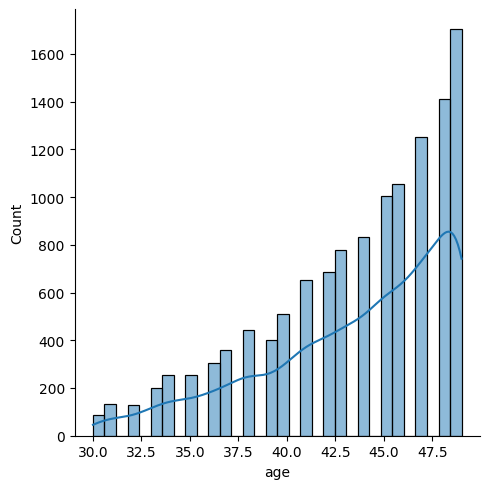

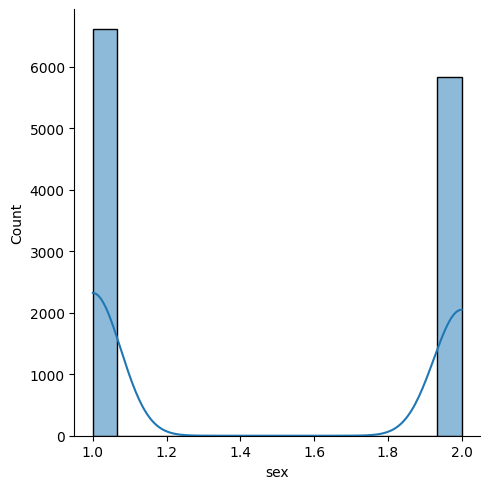

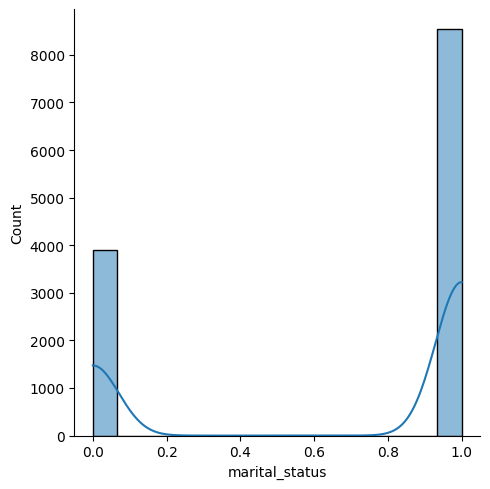

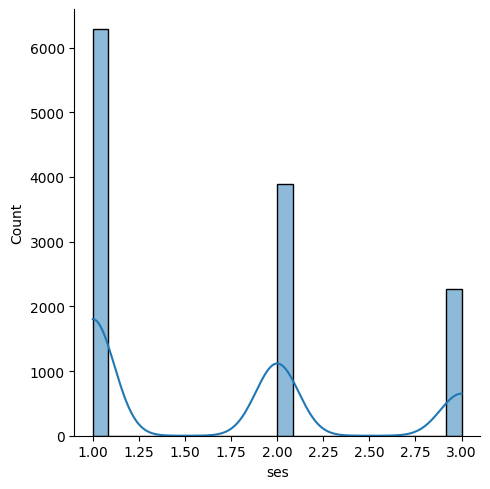

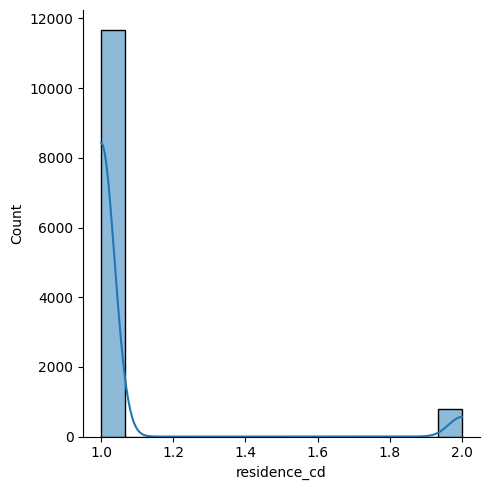

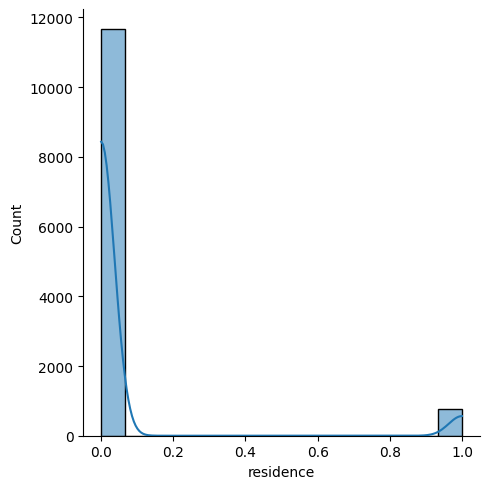

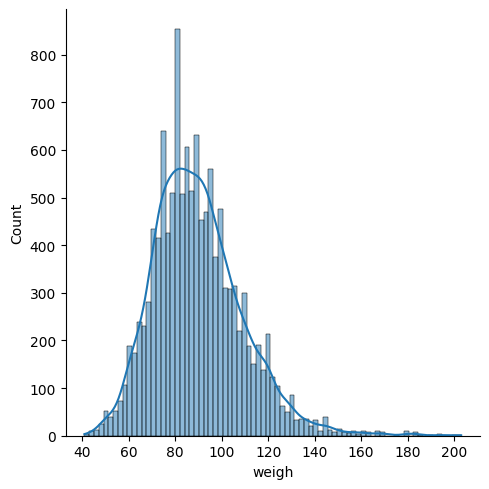

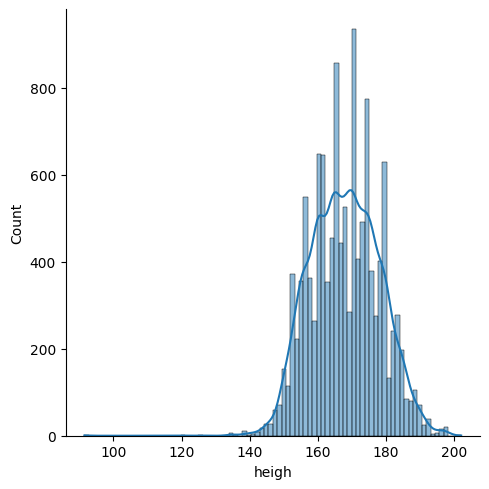

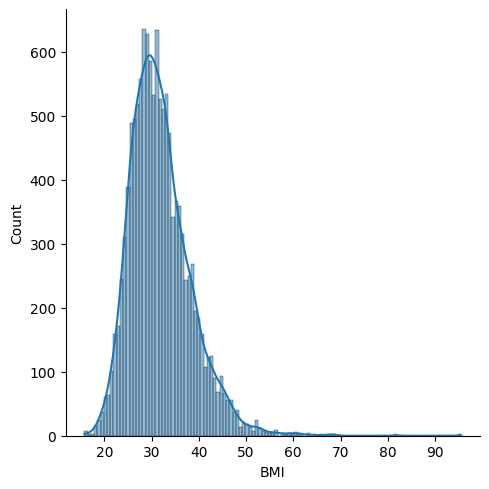

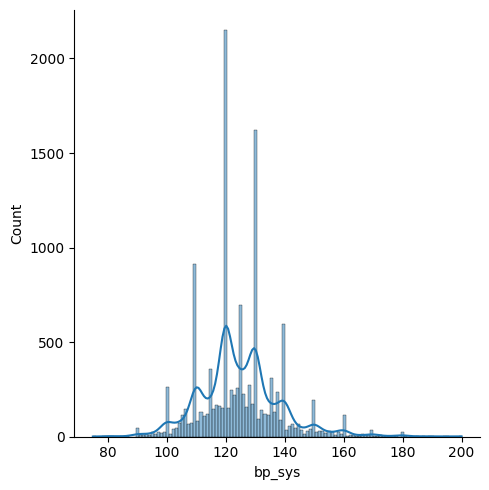

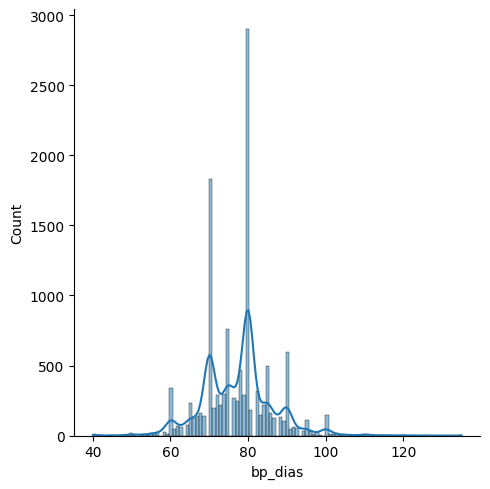

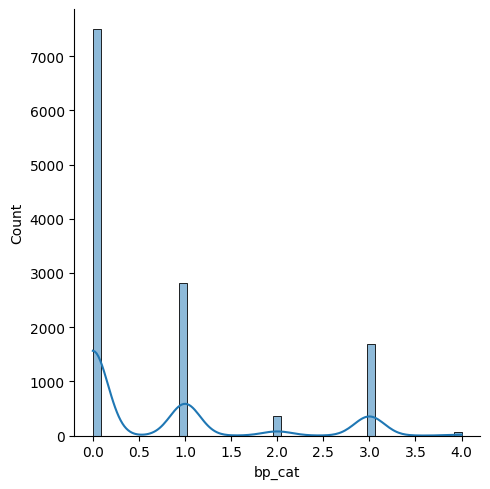

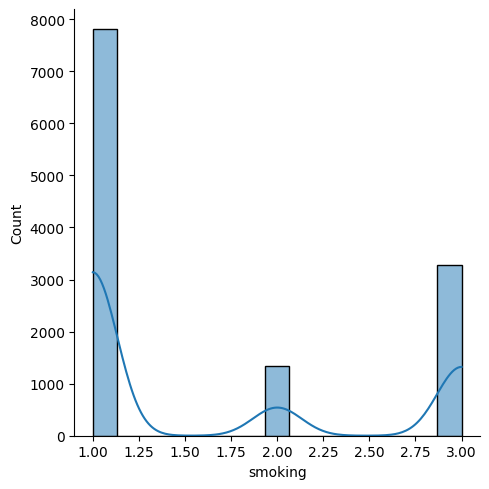

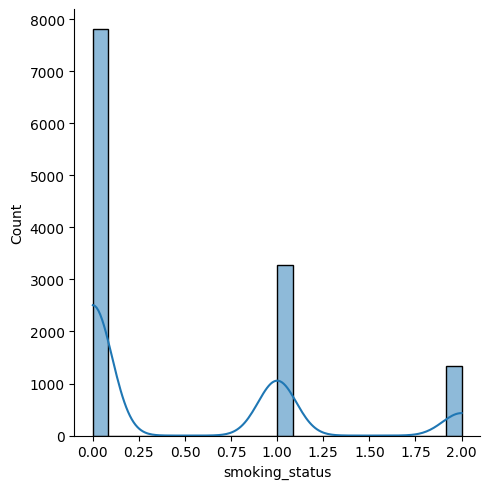

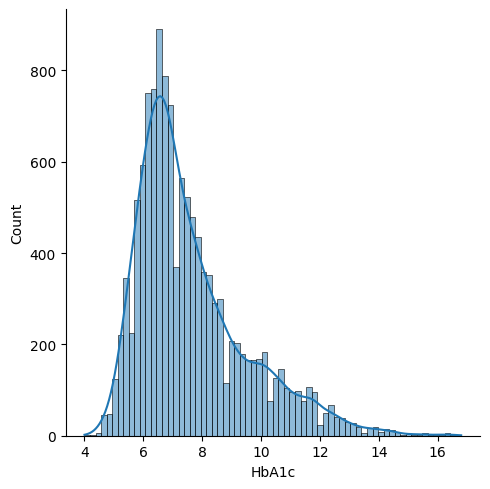

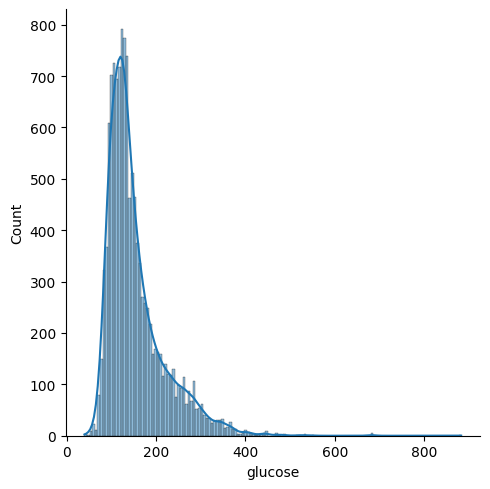

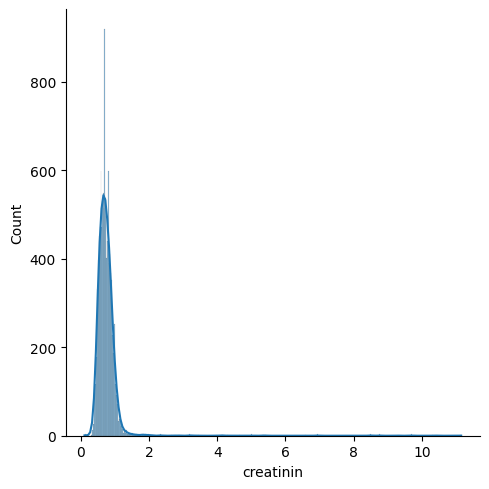

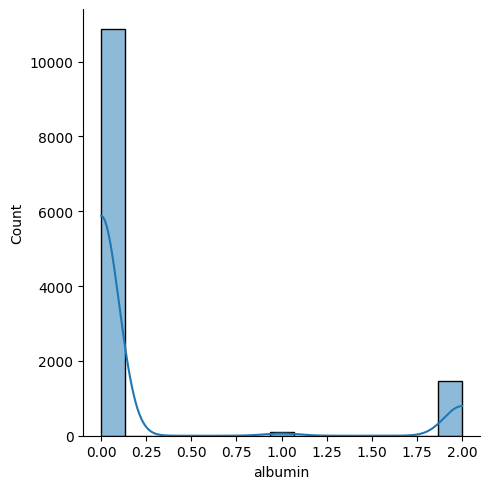

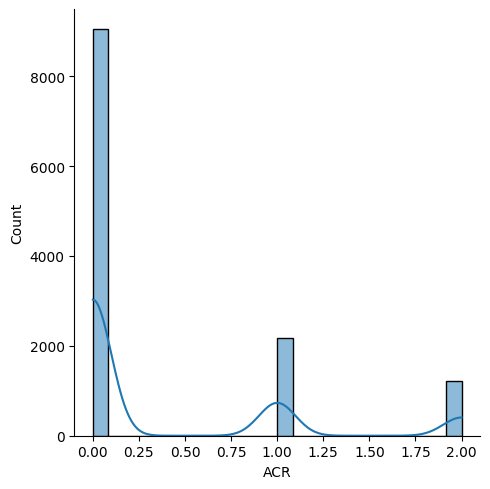

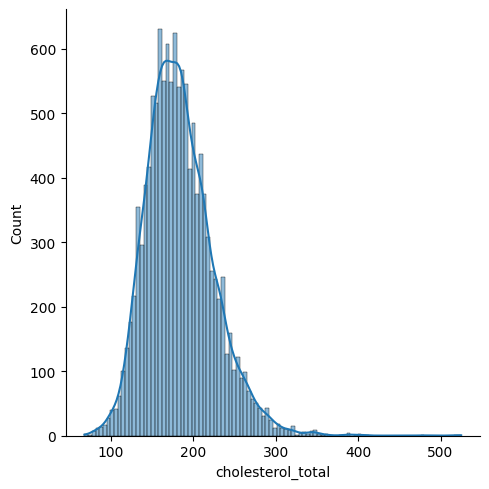

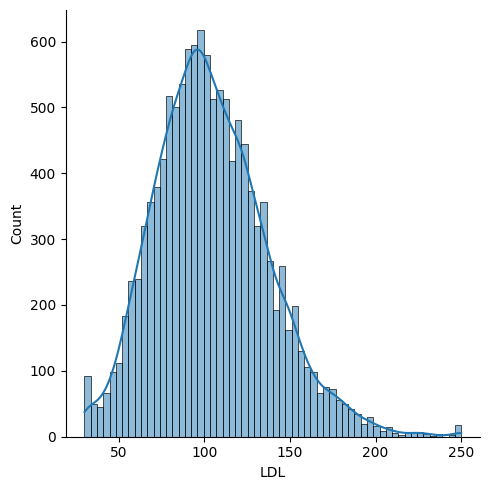

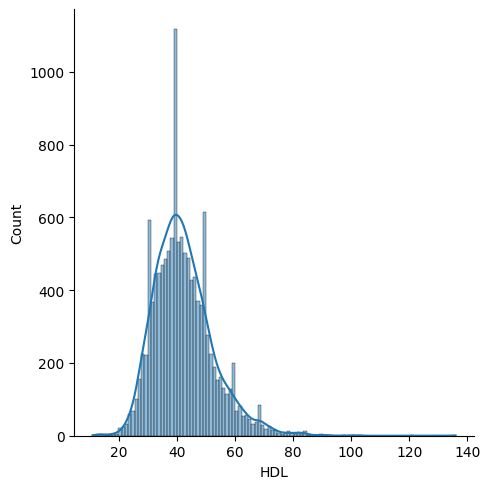

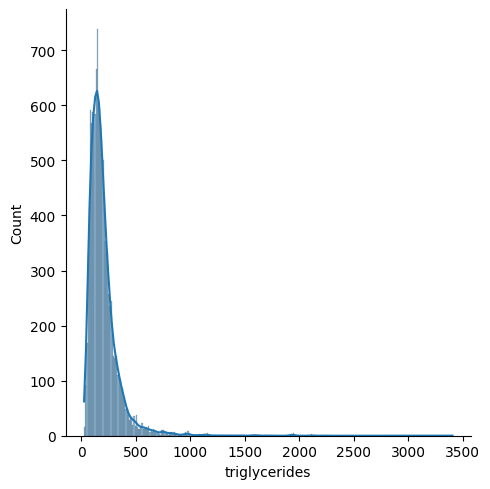

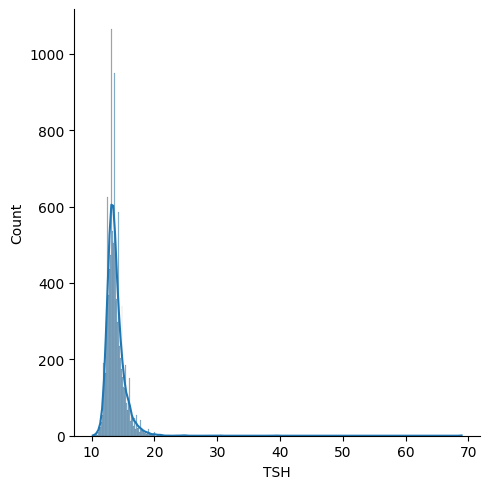

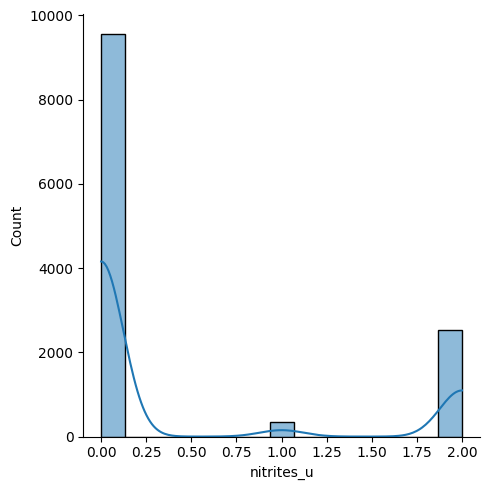

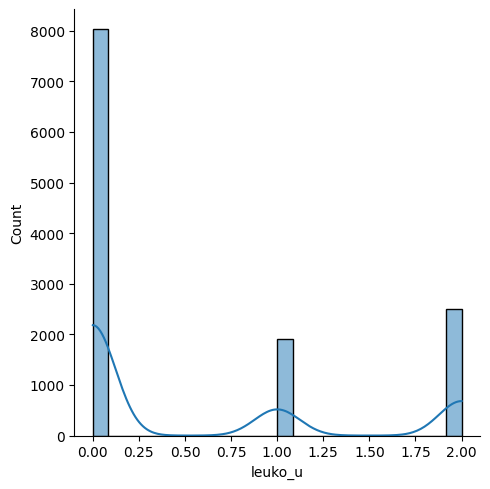

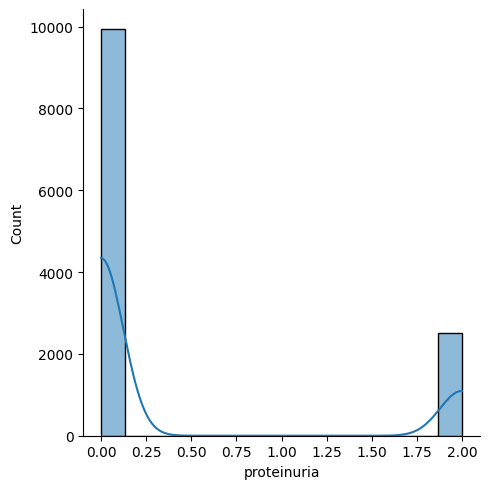

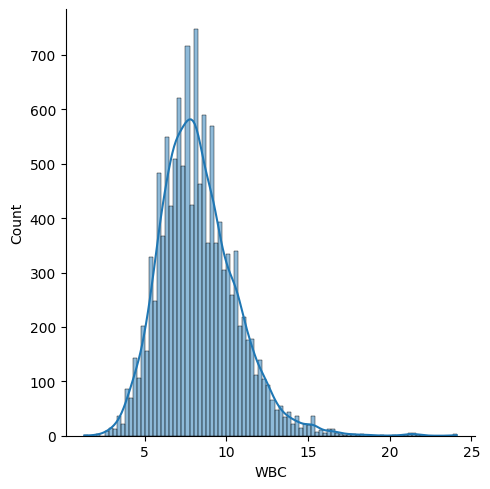

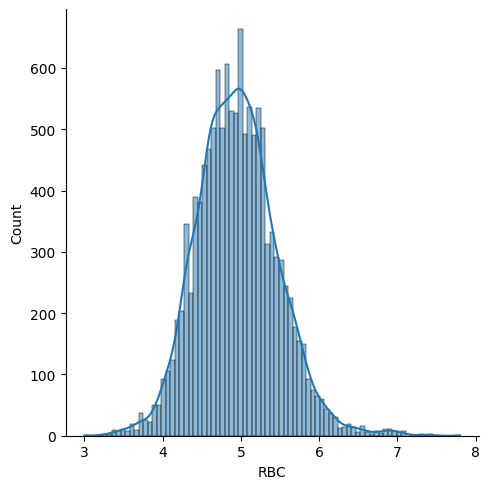

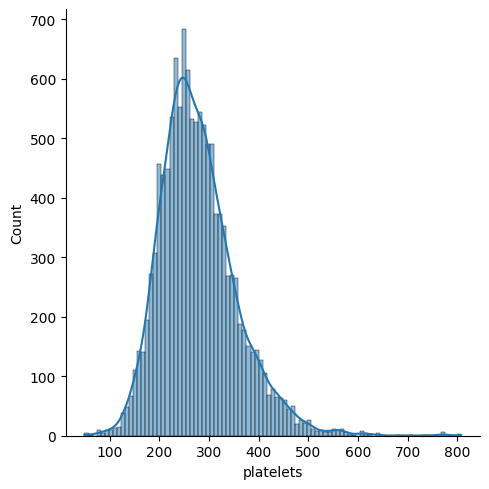

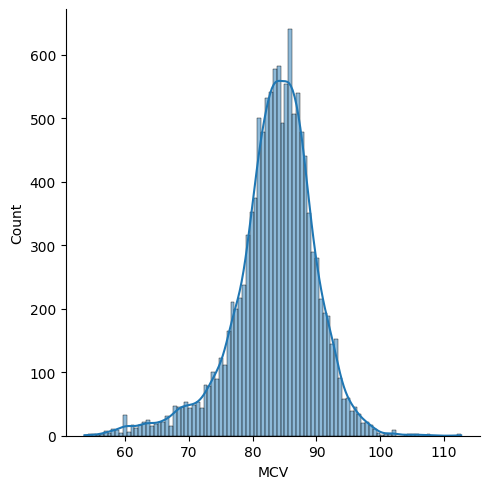

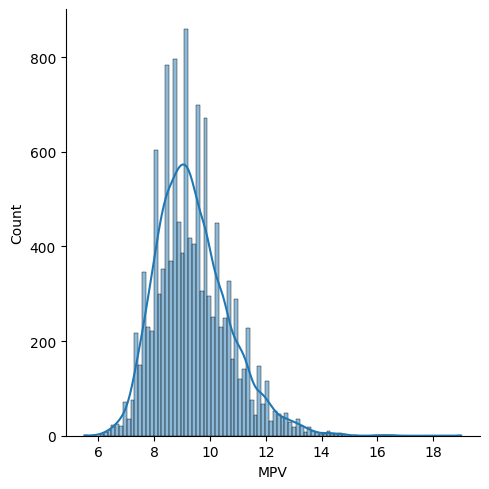

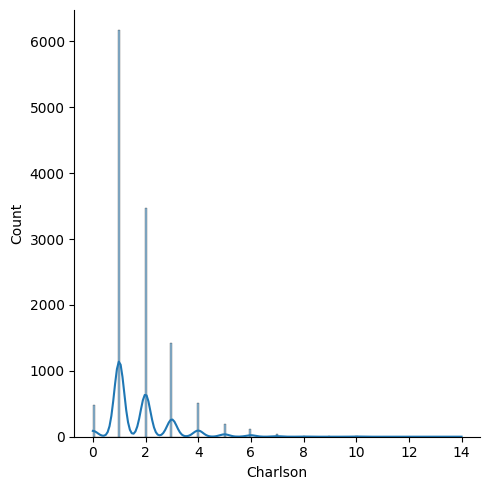

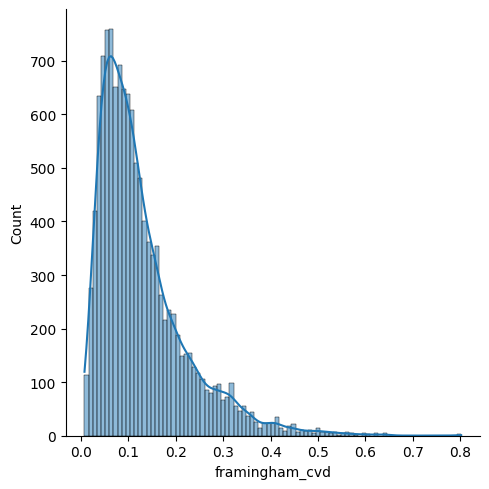

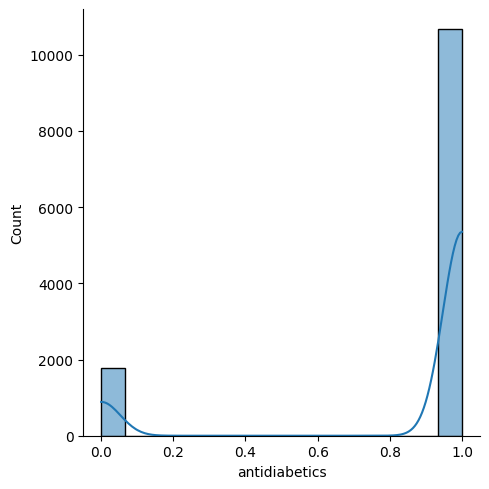

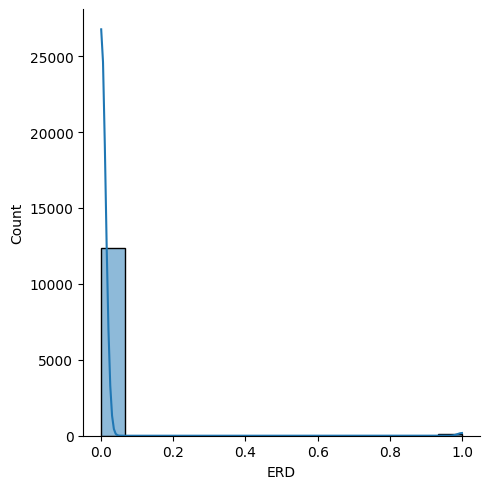

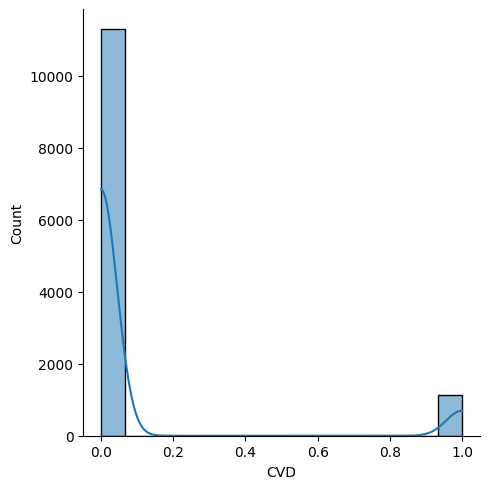

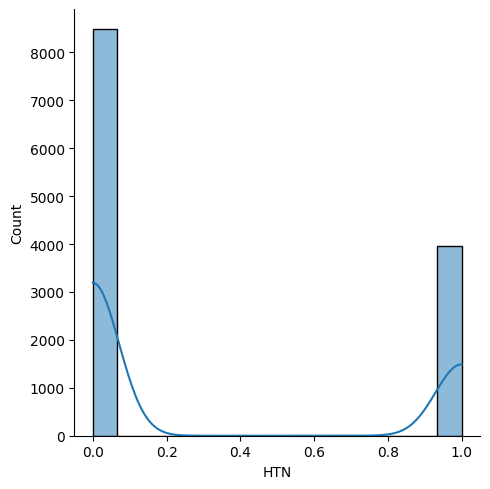

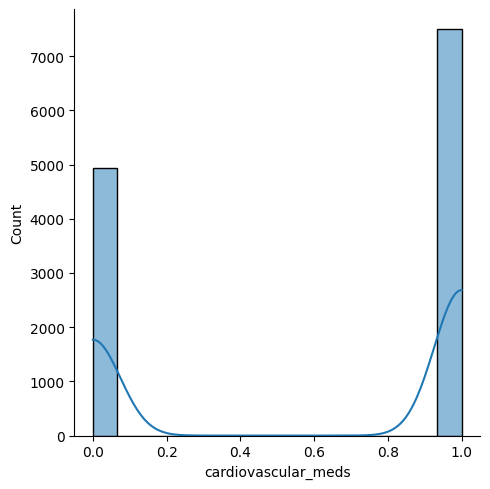

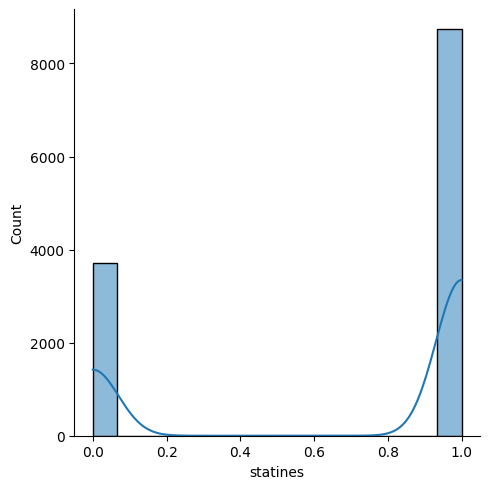

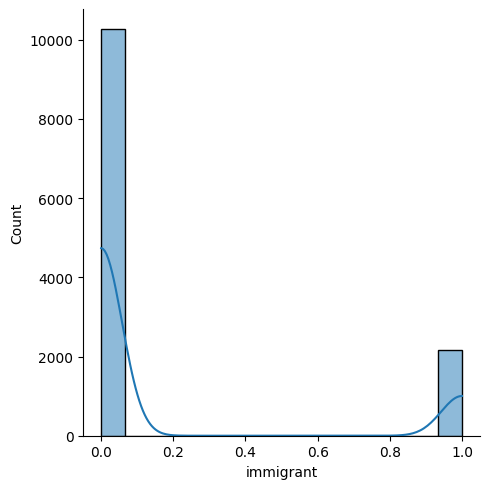

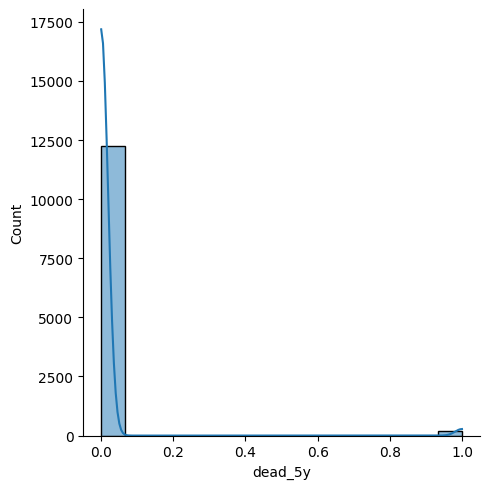

In [33]:
columnsNames = df.columns.values
for col in columnsNames:
    measurments = df[col]
    ax = sns.displot(measurments, kde=True)


In [34]:
def histogram(dataframe):
    df = dataframe.copy()
    return df.hist(bins = 7, figsize=(18, 18), grid=True)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'marital_status'}>,
        <AxesSubplot: title={'center': 'ses'}>,
        <AxesSubplot: title={'center': 'residence_cd'}>,
        <AxesSubplot: title={'center': 'residence'}>],
       [<AxesSubplot: title={'center': 'weigh'}>,
        <AxesSubplot: title={'center': 'heigh'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'bp_sys'}>,
        <AxesSubplot: title={'center': 'bp_dias'}>,
        <AxesSubplot: title={'center': 'bp_cat'}>],
       [<AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'smoking_status'}>,
        <AxesSubplot: title={'center': 'HbA1c'}>,
        <AxesSubplot: title={'center': 'glucose'}>,
        <AxesSubplot: title={'center': 'creatinin'}>,
        <AxesSubplot: title={'center': 'albumin'}>],
       [<AxesSubplot: title={'center': 'ACR'}>,
        <AxesS

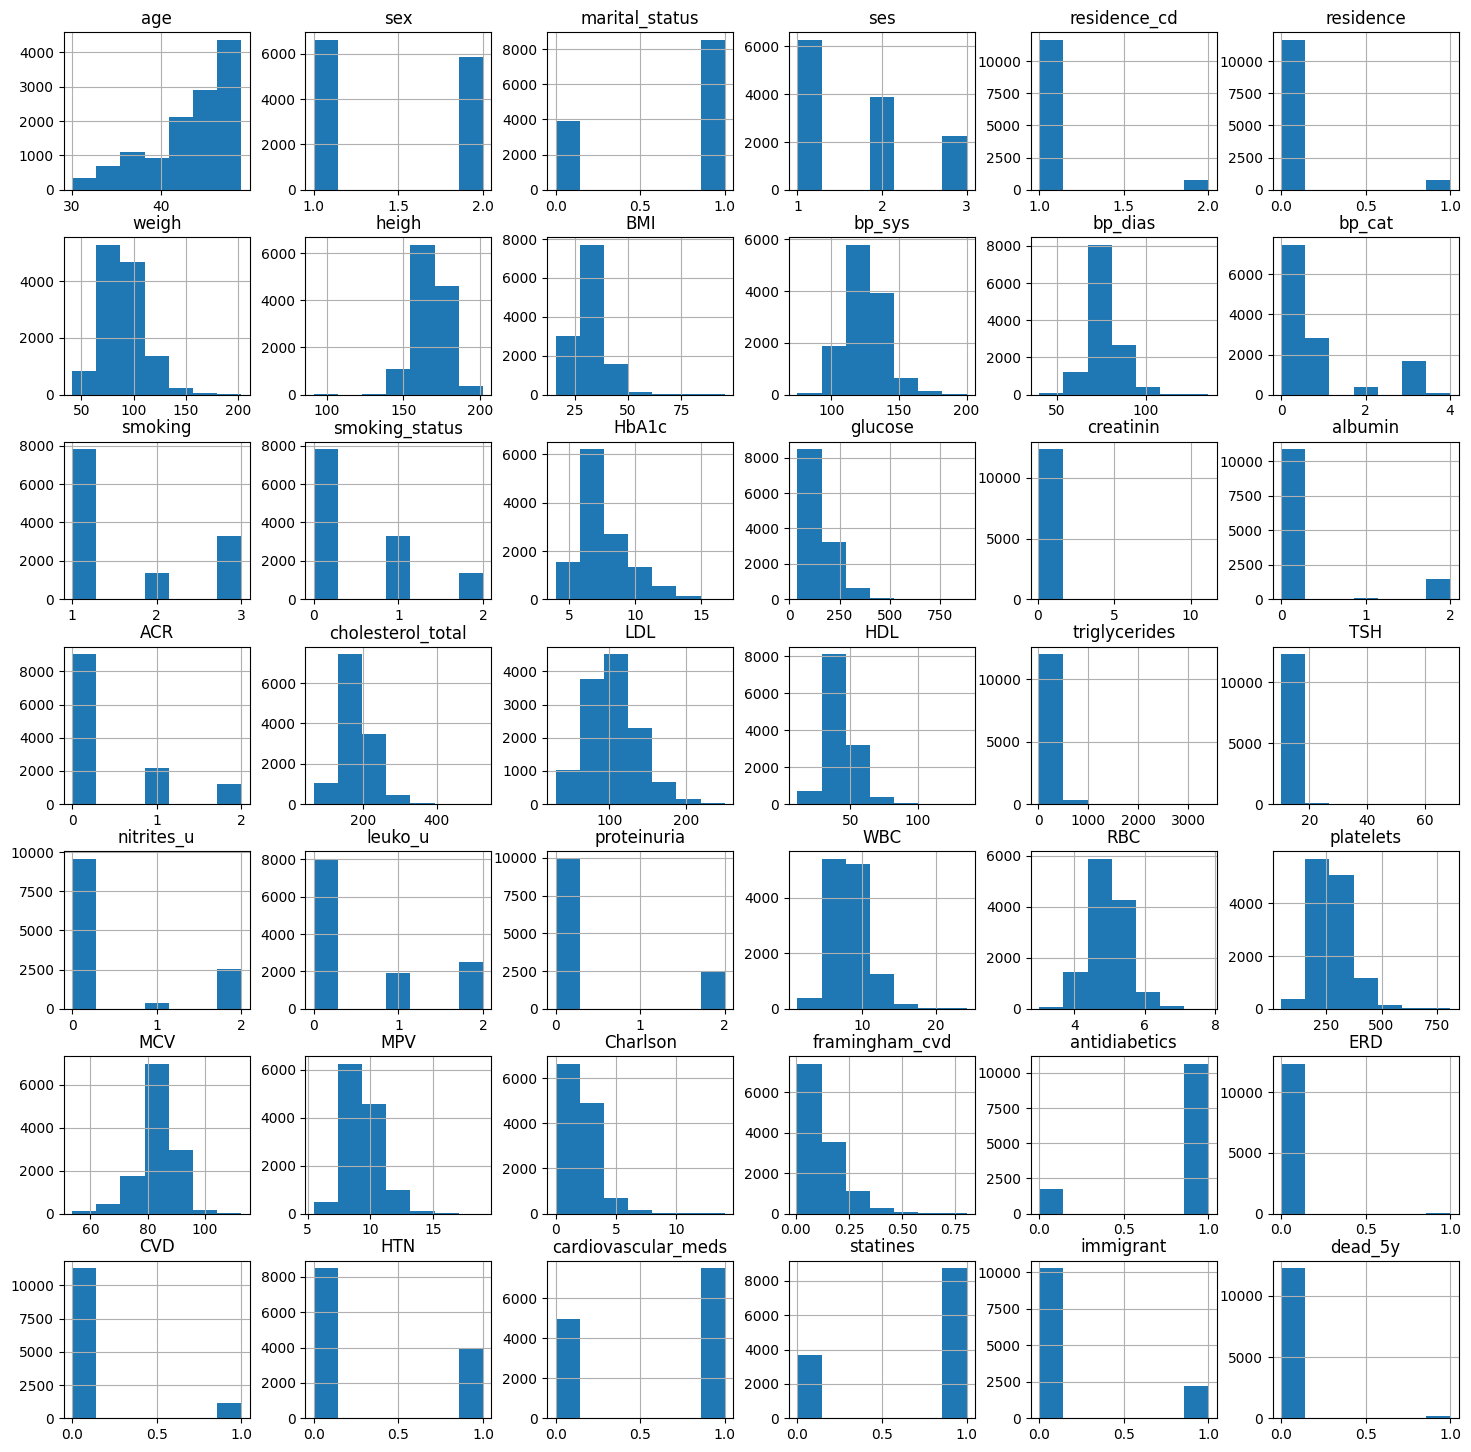

In [35]:
histogram(df)

In [36]:
df[['age', 'dead_5y']].groupby(['age'], as_index=False).mean().sort_values(by='dead_5y',ascending=True)

,age,dead_5y
11,41,0.007669
8,38,0.008989
14,44,0.009615
10,40,0.009804
3,33,0.010101
12,42,0.010234
13,43,0.010283
15,45,0.010945
0,30,0.011494
18,48,0.014904


In [37]:
df[['weigh', 'dead_5y']].groupby(['weigh'], as_index=False).mean().sort_values(by='dead_5y',ascending=True)

,weigh,dead_5y
0,41.00,0.0
380,102.20,0.0
378,101.80,0.0
377,101.50,0.0
376,101.40,0.0
...,...,...
562,166.80,0.5
221,83.20,1.0
515,133.50,1.0
180,78.65,1.0


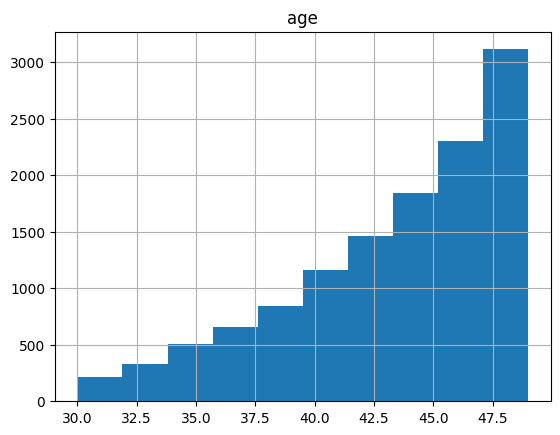

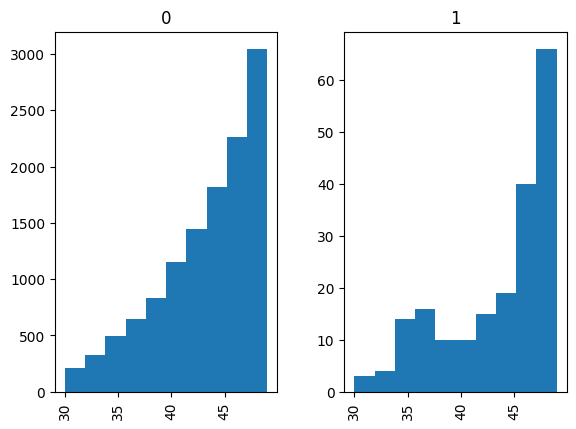

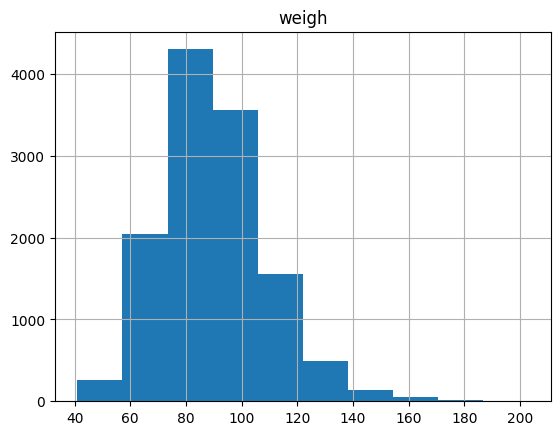

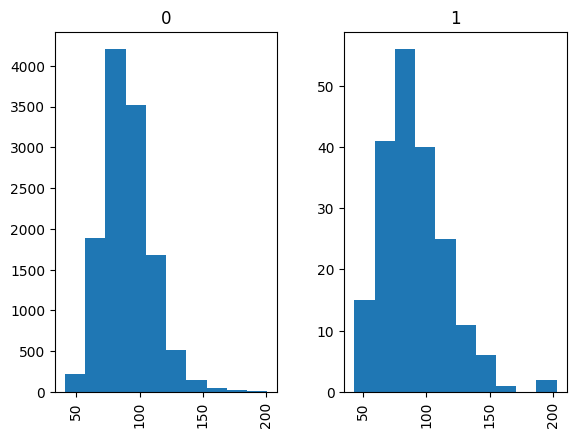

In [38]:
train_hist_sib = df.hist("age")
train_hist_Age_s = df.hist("age", "dead_5y")
train_hist_sib = df.hist("weigh")
train_hist_sib = df.hist("weigh","dead_5y")

#### 
[Go to the beginning of the assignment](#home)
<a id="Correlations"></a>
### Correlations

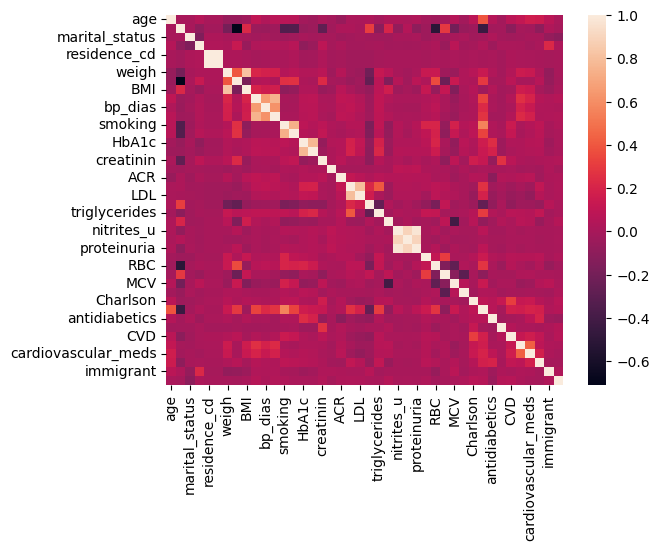

In [39]:
dataplot=sns.heatmap(df.corr())
plt.show()

In [40]:
def get_highly_correlated_cols(df):
    correlations =[]
    tuple_arr = []
    df2 = df.corr(method='pearson')
    for index1, value1 in enumerate(df2.columns):
        for index2, value2 in enumerate(df2.columns):
            if index1<index2 and df2.iloc[index1,index2]>=0.5:
                correlations.append(df2.iloc[index1,index2])
                tuple_arr.append((value1,value2))           
    return correlations, tuple_arr

In [41]:
correlation,correlated_coulmns = get_highly_correlated_cols(df)
for i in range(len(correlation)):
    print(f'{correlated_coulmns[i]}: {correlation[i]}')

('residence_cd', 'residence'): 0.9999999999999999
('weigh', 'BMI'): 0.8169976385015675
('bp_sys', 'bp_dias'): 0.6493436586470458
('bp_sys', 'bp_cat'): 0.7528763834428506
('bp_dias', 'bp_cat'): 0.6185770995530873
('smoking', 'smoking_status'): 0.7375953777759232
('smoking', 'framingham_cvd'): 0.5540314174783227
('HbA1c', 'glucose'): 0.7680960538059772
('cholesterol_total', 'LDL'): 0.7956319274826297
('nitrites_u', 'leuko_u'): 0.8900072112957611
('nitrites_u', 'proteinuria'): 0.970730202567755
('leuko_u', 'proteinuria'): 0.8995719096736774


When there are two independent variables that are very highly correlated, we should remove one of them. 
If two variables are so highly correlated they will obviously impart nearly exactly the same information to our regression model. But, by including both we are actually weakening the model. We are not adding incremental information. Instead, we are infusing our model with noise.


In [42]:
df.shape

(12438, 42)

In [43]:
def get_highly_correlated_cols(df):
    cols_to_drop = []
    df2 = df.corr(method='pearson')
    for index1, value1 in enumerate(df2.columns):
        for index2, value2 in enumerate(df2.columns):
            if index1 < index2 and df2.iloc[index1, index2] >= 0.7:
                if value1 not in cols_to_drop:
                    if df[value1].var() > df[value2].var():
                        cols_to_drop.append(value2)
                    else:
                        cols_to_drop.append(value1)
    print('cols to drop:', cols_to_drop)
    return cols_to_drop

cols_to_drop = get_highly_correlated_cols(df)
df.drop(cols_to_drop, axis=1,inplace=True)
df.shape

cols to drop: ['residence_cd', 'BMI', 'bp_cat', 'smoking_status', 'HbA1c', 'LDL', 'leuko_u', 'proteinuria']


(12438, 34)

#### 
[Go to the beginning of the assignment](#home)
<a id="Outliars"></a>
### Outliars detection & Boxplots

In [44]:
df.columns

Index(['age', 'sex', 'marital_status', 'ses', 'residence', 'weigh', 'heigh',
       'bp_sys', 'bp_dias', 'smoking', 'glucose', 'creatinin', 'albumin',
       'ACR', 'cholesterol_total', 'HDL', 'triglycerides', 'TSH', 'nitrites_u',
       'WBC', 'RBC', 'platelets', 'MCV', 'MPV', 'Charlson', 'framingham_cvd',
       'antidiabetics', 'ERD', 'CVD', 'HTN', 'cardiovascular_meds', 'statines',
       'immigrant', 'dead_5y'],
      dtype='object')

In [45]:
def boxplot(df):
    a4_dims = (21, 8)
    f, ax = plt.subplots(2,3,figsize=a4_dims)
    df_part1 = df.loc[:,'age':'weigh']
    sns.boxplot(ax=ax[0,0],data=df_part1)
    df_part2 = df.loc[:,'bp_sys':'ACR']
    sns.boxplot(ax=ax[0,1],data=df_part2)
    df_part3 = df.loc[:,'cholesterol_total':'RBC']
    sns.boxplot(ax=ax[0,2],data=df_part3)
    df_part4 = df.loc[:,'platelets':'framingham_cvd']
    sns.boxplot(ax=ax[1,0],data=df_part4)
    df_part5 = df.loc[:,'antidiabetics':'statines']
    sns.boxplot(ax=ax[1,1],data=df_part5)
    df_part6 = df.loc[:,'immigrant':'dead_5y']
    sns.boxplot(ax=ax[1,2],data=df_part6)

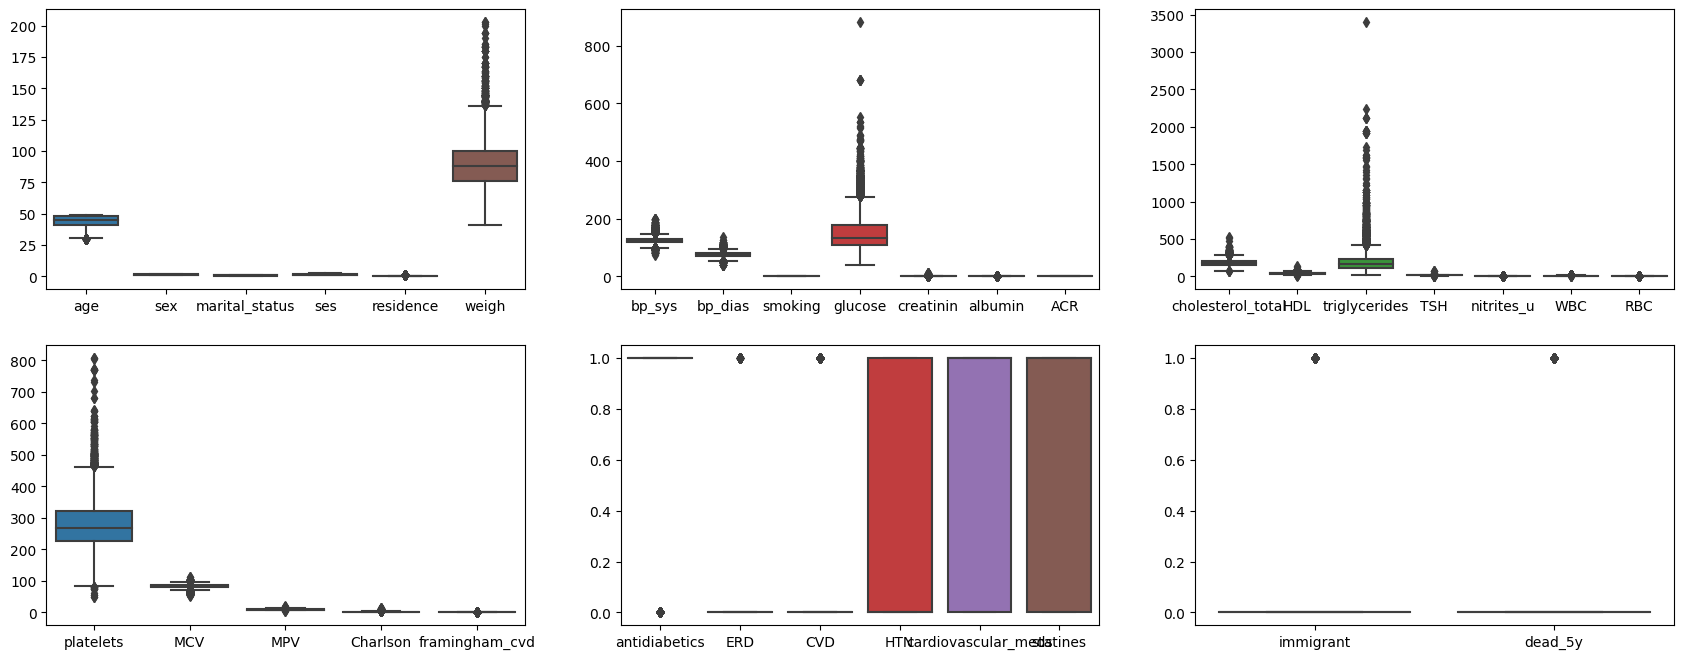

In [46]:
boxplot(df)

LocalOutlierFactor method - The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [47]:
anomaly_clf = LocalOutlierFactor(n_neighbors=20)
anomaly_detection_results = anomaly_clf.fit_predict(df)
print(np.unique(anomaly_detection_results, return_counts=True))
np.unique(anomaly_detection_results, return_counts=True)
anomalies_filter = [True if f == 1 else False for f in anomaly_detection_results]
df = df[anomalies_filter]
df.shape


(array([-1,  1]), array([   71, 12367]))


(12367, 34)

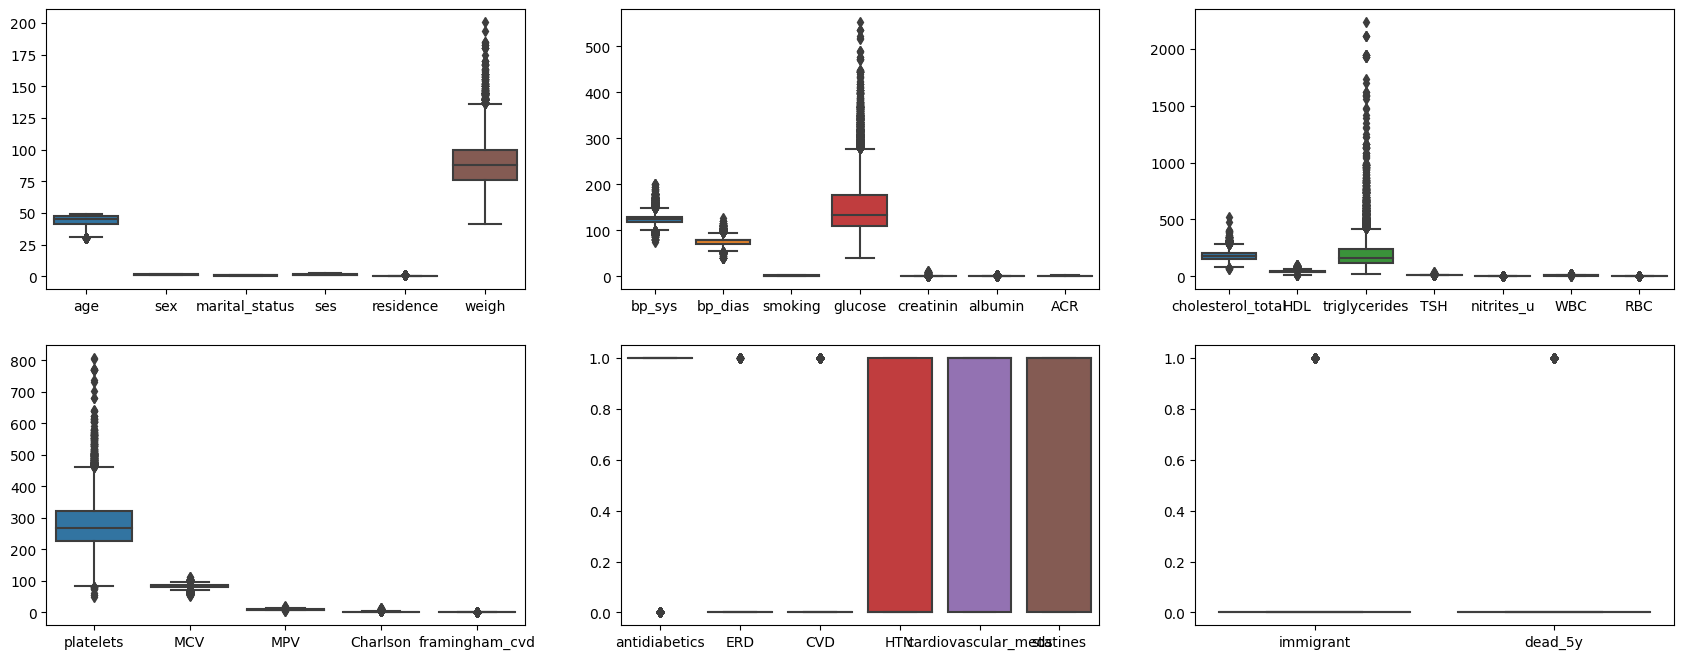

In [48]:
boxplot(df)

In [49]:
columnsThatHasContinuousValues = []
columnsNames = df.columns.values
for i in columnsNames:
    if(type(df[i][0]).__name__ == 'float64'):
        columnsThatHasContinuousValues.append(i)
print(f'The continuous columns are: {columnsThatHasContinuousValues}|')

The continuous columns are: ['weigh', 'heigh', 'creatinin', 'cholesterol_total', 'HDL', 'TSH', 'WBC', 'RBC', 'MCV', 'MPV', 'framingham_cvd']|


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12367 entries, 0 to 12437
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12367 non-null  int64  
 1   sex                  12367 non-null  int64  
 2   marital_status       12367 non-null  int64  
 3   ses                  12367 non-null  int64  
 4   residence            12367 non-null  int64  
 5   weigh                12367 non-null  float64
 6   heigh                12367 non-null  float64
 7   bp_sys               12367 non-null  int64  
 8   bp_dias              12367 non-null  int64  
 9   smoking              12367 non-null  int64  
 10  glucose              12367 non-null  int64  
 11  creatinin            12367 non-null  float64
 12  albumin              12367 non-null  int64  
 13  ACR                  12367 non-null  int64  
 14  cholesterol_total    12367 non-null  float64
 15  HDL                  12367 non-null 

#### 
[Go to the beginning of the assignment](#home)
<a id="statistics"></a>
### Statistics

In [51]:
data = {
    'Range': [],
    'Mean': df.mean(),
    'Std': df.std(),
}
for col in df.columns.tolist():
    data['Range'].append((df[col].min(),df[col].max()))
info = pd.DataFrame(data)
info = info.reset_index()
info.rename(columns = {'index':'Variable'}, inplace = True)
info

,Variable,Range,Mean,Std
0,age,"(30, 49)",43.507641,4.800795
1,sex,"(1, 2)",1.468990,0.499058
2,marital_status,"(0, 1)",0.687070,0.463705
3,ses,"(1, 3)",1.677610,0.763240
4,residence,"(0, 1)",0.062748,0.242518
5,weigh,"(41.0, 200.9)",89.670449,18.907508
6,heigh,"(120.0, 202.0)",167.952074,10.022739
7,bp_sys,"(75, 200)",124.724428,13.489883
8,bp_dias,"(40, 126)",77.269427,8.831927
9,smoking,"(1, 3)",1.636694,0.871618


#### 
[Go to the beginning of the assignment](#home)
<a id="Discretize"></a>
### Discretize Continuous Columns

First, we want to know which columns should we discretize

 we replace the values of continuous variables by the predictions made by a 
     decision tree

In [52]:
columnsToDiscretize = []
columnsToRemain = []

for col in df.columns:
    if df[col].nunique() > 5:
        columnsToDiscretize.append(col)
    else:
        columnsToRemain.append(col)
              
print(f'Columns to discretize: {columnsToDiscretize}\n')
print(f'Columns that are already discretized: {columnsToRemain}')



Columns to discretize: ['age', 'weigh', 'heigh', 'bp_sys', 'bp_dias', 'glucose', 'creatinin', 'cholesterol_total', 'HDL', 'triglycerides', 'TSH', 'WBC', 'RBC', 'platelets', 'MCV', 'MPV', 'Charlson', 'framingham_cvd']

Columns that are already discretized: ['sex', 'marital_status', 'ses', 'residence', 'smoking', 'albumin', 'ACR', 'nitrites_u', 'antidiabetics', 'ERD', 'CVD', 'HTN', 'cardiovascular_meds', 'statines', 'immigrant', 'dead_5y']


<code>determine_bins</code> function determines the number of bins needed for the KBinsDiscretizer class. <br/>
The function uses the Bayesian Blocks method to determine the number of bins. <br/>
This method uses the data to find the optimal number of bins that minimize the number of errors in reconstructing the original distribution of the data.

<b>Bayesian Blocks</b> is a binning algorithm for discretizing continuous data into a finite number of categories. It is based on the Bayesian framework and uses a changepoint model to determine the optimal number and location of bins. The algorithm adapts to the underlying distribution of the data, making it a flexible and robust method for binning. In scikit-learn, Bayesian Blocks can be used as an option for the n_bins parameter in the KBinsDiscretizer class.

In [53]:
def determine_bins(data):
    bin_edges = np.histogram(data, bins='fd')[1]
    return len(bin_edges) - 1

Create a new dataframe to store the discretized columns

In [54]:
discretized_df = pd.DataFrame()

Use the KBinsDiscretizer class from scikit-learn to discretize the data <br/><br/>
<code>KBinsDiscretizer</code> is a class in scikit-learn that performs the discretization of continuous data. It converts continuous data into categorical data by dividing the range of the continuous data into a set of bins and assigning each data point to a specific bin.

In [55]:
for col in columnsToDiscretize:
    num_bins = determine_bins(df[col]) # Choose the number of bins
    kbd = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
    discretized_df[col] = kbd.fit_transform(df[[col]]).flatten()


/opt/homebrew/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/preprocessing/_discretizat

In [56]:
df2 = pd.DataFrame(discretized_df, columns = columnsToDiscretize)
df2 = df2.astype('int')
df2

,age,weigh,heigh,bp_sys,bp_dias,glucose,creatinin,cholesterol_total,HDL,triglycerides,TSH,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd
0,15,29,11,14,6,79,23,78,15,187,12,65,53,59,75,6,1,57
1,13,7,3,11,14,30,30,23,17,131,22,47,13,13,15,12,1,35
2,13,3,0,30,27,73,24,95,33,165,25,71,76,92,57,34,1,47
3,12,14,17,2,3,73,35,19,13,24,13,51,50,61,53,21,1,44
4,15,0,12,9,10,56,40,48,33,74,6,14,23,6,84,18,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,13,1,19,28,20,42,42,21,24,35,55,67,34,91,1,18,1,51
12363,12,31,2,2,2,14,32,37,20,182,25,67,12,36,89,42,1,19
12364,15,3,17,4,9,6,54,31,12,97,36,29,31,65,37,27,3,88
12365,14,36,11,1,2,26,22,37,9,176,12,16,19,45,66,9,1,6


In [57]:
df3 = df[columnsToRemain]
df3

,sex,marital_status,ses,residence,smoking,albumin,ACR,nitrites_u,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,2,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0
1,2,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0
2,2,0,1,0,1,2,0,0,1,0,0,1,1,1,0,0
3,1,0,2,0,3,0,0,0,1,0,0,0,0,1,0,0
4,2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,1,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0
12434,2,1,1,0,1,0,0,2,1,0,0,0,0,1,0,0
12435,1,0,1,0,3,0,2,0,0,0,1,1,1,1,0,0
12436,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [58]:
df = pd.concat([df2.reset_index(drop=True),df3.reset_index(drop=True)], axis=1)
df


,age,weigh,heigh,bp_sys,bp_dias,glucose,creatinin,cholesterol_total,HDL,triglycerides,...,ACR,nitrites_u,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,15,29,11,14,6,79,23,78,15,187,...,0,0,1,0,0,1,1,1,0,0
1,13,7,3,11,14,30,30,23,17,131,...,0,0,1,0,0,0,1,1,0,0
2,13,3,0,30,27,73,24,95,33,165,...,0,0,1,0,0,1,1,1,0,0
3,12,14,17,2,3,73,35,19,13,24,...,0,0,1,0,0,0,0,1,0,0
4,15,0,12,9,10,56,40,48,33,74,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,13,1,19,28,20,42,42,21,24,35,...,0,0,1,0,0,0,1,0,0,0
12363,12,31,2,2,2,14,32,37,20,182,...,0,2,1,0,0,0,0,1,0,0
12364,15,3,17,4,9,6,54,31,12,97,...,2,0,0,0,1,1,1,1,0,0
12365,14,36,11,1,2,26,22,37,9,176,...,0,0,1,0,0,0,0,1,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12367 entries, 0 to 12366
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  12367 non-null  int64
 1   weigh                12367 non-null  int64
 2   heigh                12367 non-null  int64
 3   bp_sys               12367 non-null  int64
 4   bp_dias              12367 non-null  int64
 5   glucose              12367 non-null  int64
 6   creatinin            12367 non-null  int64
 7   cholesterol_total    12367 non-null  int64
 8   HDL                  12367 non-null  int64
 9   triglycerides        12367 non-null  int64
 10  TSH                  12367 non-null  int64
 11  WBC                  12367 non-null  int64
 12  RBC                  12367 non-null  int64
 13  platelets            12367 non-null  int64
 14  MCV                  12367 non-null  int64
 15  MPV                  12367 non-null  int64
 16  Charlson             1

Now, all the values are integers

In [60]:
df.describe()

,age,weigh,heigh,bp_sys,bp_dias,glucose,creatinin,cholesterol_total,HDL,triglycerides,...,ACR,nitrites_u,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
count,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,...,12367.00000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000
mean,10.459125,33.818226,19.422010,22.045686,17.174092,44.331527,38.517264,50.176680,17.940163,100.054096,...,0.36937,0.433331,0.858090,0.006388,0.091777,0.317296,0.602005,0.703081,0.174416,0.015283
std,4.446631,19.052023,10.186275,10.498674,7.823296,25.581193,18.671510,29.140678,9.138129,58.072362,...,0.65385,0.806771,0.348972,0.079672,0.288722,0.465443,0.489504,0.456919,0.379482,0.122680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,17.000000,11.000000,16.000000,10.000000,22.000000,25.000000,25.000000,11.000000,51.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,34.000000,19.000000,22.000000,19.000000,44.000000,36.000000,50.000000,17.000000,98.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,15.000000,49.000000,27.000000,28.000000,20.000000,66.000000,51.000000,75.000000,24.000000,150.000000,...,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,15.000000,68.000000,39.000000,45.000000,34.000000,88.000000,96.000000,100.000000,39.000000,202.000000,...,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.to_csv("cleaned_medical_data.csv",index=False)
print(f'The shape of the df is: {df.shape}')

The shape of the df is: (12367, 34)


### 
[Go to the beginning of the assignment](#home)
<a id="Normalize"></a>
### Normalize Data
Standardizing the features around the center and 0 with a standard deviation of 
1 is important when we compare measurements that have different units. 
Variables that are measured at different scales do not contribute equally to the 
analysis and might end up creating a bais.

In [62]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [63]:
normalized_data = normalize(df)
normalized_data.reset_index(drop = True)

,age,weigh,heigh,bp_sys,bp_dias,glucose,creatinin,cholesterol_total,HDL,triglycerides,...,ACR,nitrites_u,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,1.000000,0.426471,0.282051,0.311111,0.176471,0.897727,0.239583,0.78,0.384615,0.925743,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.866667,0.102941,0.076923,0.244444,0.411765,0.340909,0.312500,0.23,0.435897,0.648515,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.866667,0.044118,0.000000,0.666667,0.794118,0.829545,0.250000,0.95,0.846154,0.816832,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.800000,0.205882,0.435897,0.044444,0.088235,0.829545,0.364583,0.19,0.333333,0.118812,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.000000,0.307692,0.200000,0.294118,0.636364,0.416667,0.48,0.846154,0.366337,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,0.866667,0.014706,0.487179,0.622222,0.588235,0.477273,0.437500,0.21,0.615385,0.173267,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12363,0.800000,0.455882,0.051282,0.044444,0.058824,0.159091,0.333333,0.37,0.512821,0.900990,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12364,1.000000,0.044118,0.435897,0.088889,0.264706,0.068182,0.562500,0.31,0.307692,0.480198,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
12365,0.933333,0.529412,0.282051,0.022222,0.058824,0.295455,0.229167,0.37,0.230769,0.871287,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
normalized_data.to_csv("normalize_cleaned_medical_data.csv",index=False)
print(f'The shape of the new csv is: {normalized_data.shape}')

The shape of the new csv is: (12367, 34)
